In [3]:
#       Dependencies  #
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.utils import pad_sequences
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
%matplotlib notebook
#       Seeding      #
tf.random.set_seed(42)
np.random.seed(42)

In [6]:
data = pd.read_csv('train.csv')
# Remove rows with NaN in the first row
data = data.dropna(subset=[data.columns[0]])

# Reset the index after dropping the row
data = data.reset_index(drop=True)

data['label'] = data['label']

In [7]:
data_test = pd.read_csv('test.csv')
# Remove rows with NaN in the first row
data_test = data_test.dropna(subset=[data_test.columns[0]])

# Reset the index after dropping the row
data_test = data_test.reset_index(drop=True)

data_test['label'] =data_test['label']

In [8]:
# Scalling
scaler=StandardScaler()
data['SOP']=scaler.fit_transform(data[['SOP']])
data_test['SOP']=scaler.transform(data_test[['SOP']])

In [9]:
# Retreving Train Data
signal_values = data['SOP']
labels = data['label']
# Retreving Test Data
signal_values_test = data_test['SOP'] 
labels_test = data_test['label']

In [15]:
def create_dataset(X, y, time_steps=20):
    X1, y1 = [], []
    for i in range(len(X) - time_steps):
        t = X.iloc[i:(i + time_steps)].values
        X1.append(t)
        y1.append(y.iloc[i + time_steps])
    return np.array(X1), np.array(y1)

In [17]:
# Making Training Data
X_train, y_train = create_dataset(
  data[['SOP']],
  data.SOP
)
# Making Test Data
X_test, y_test = create_dataset(
  data_test[['SOP']],
  data_test.SOP
)

In [19]:
import keras
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64,
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(
  keras.layers.TimeDistributed(
    keras.layers.Dense(units=X_train.shape[2])
  )
)
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 20, 64)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 20, 64)            0         
                                                                 
 time_distributed (TimeDistr  (None, 20, 1)            65        
 ibuted)                                                

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
1163/1163 [==============================] - 52s 38ms/step - loss: 0.1963 - val_loss: 0.2491
Epoch 2/20
1163/1163 [==============================] - 40s 34ms/step - loss: 0.1861 - val_loss: 0.2452
Epoch 3/20
1163/1163 [==============================] - 28s 24ms/step - loss: 0.1837 - val_loss: 0.2439
Epoch 4/20
1163/1163 [==============================] - 31s 27ms/step - loss: 0.1822 - val_loss: 0.2449
Epoch 5/20
1163/1163 [==============================] - 30s 26ms/step - loss: 0.1814 - val_loss: 0.2458
Epoch 6/20
1163/1163 [==============================] - 26s 23ms/step - loss: 0.1808 - val_loss: 0.2413
Epoch 7/20
1163/1163 [==============================] - 31s 27ms/step - loss: 0.1801 - val_loss: 0.2409
Epoch 8/20
1163/1163 [==============================] - 32s 27ms/step - loss: 0.1792 - val_loss: 0.2422
Epoch 9/20
1163/1163 [==============================] - 31s 27ms/step - loss: 0.1781 - val_loss: 0.2385
Epoch 10/20
1163/1163 [==============================] - 31s 27m

<IPython.core.display.Javascript object>


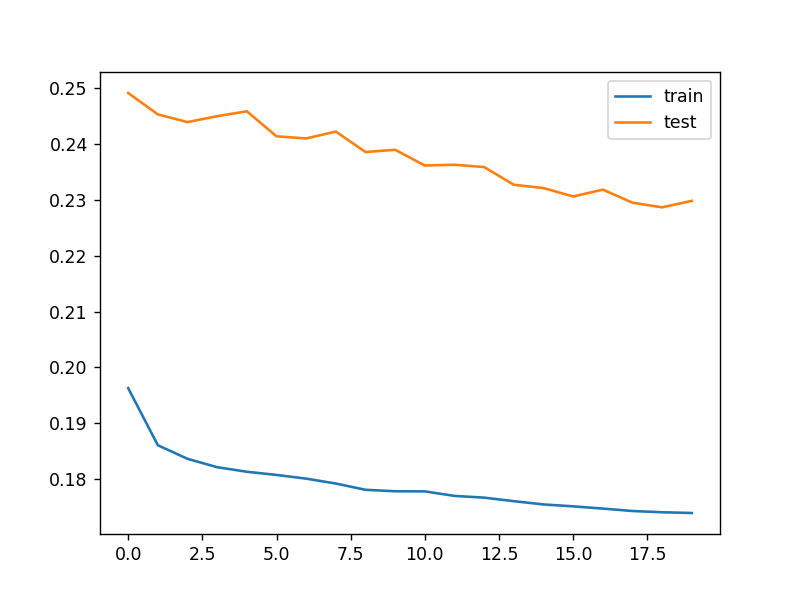

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [22]:
pred = model.predict(X_test, verbose=2)

927/927 - 10s - 10s/epoch - 11ms/step


In [23]:
model.evaluate(X_test,y_test,verbose=2)

927/927 - 10s - loss: 0.1775 - 10s/epoch - 11ms/step


0.1775120049715042

In [37]:
X_train.shape

(41334, 20, 1)

<IPython.core.display.Javascript object>


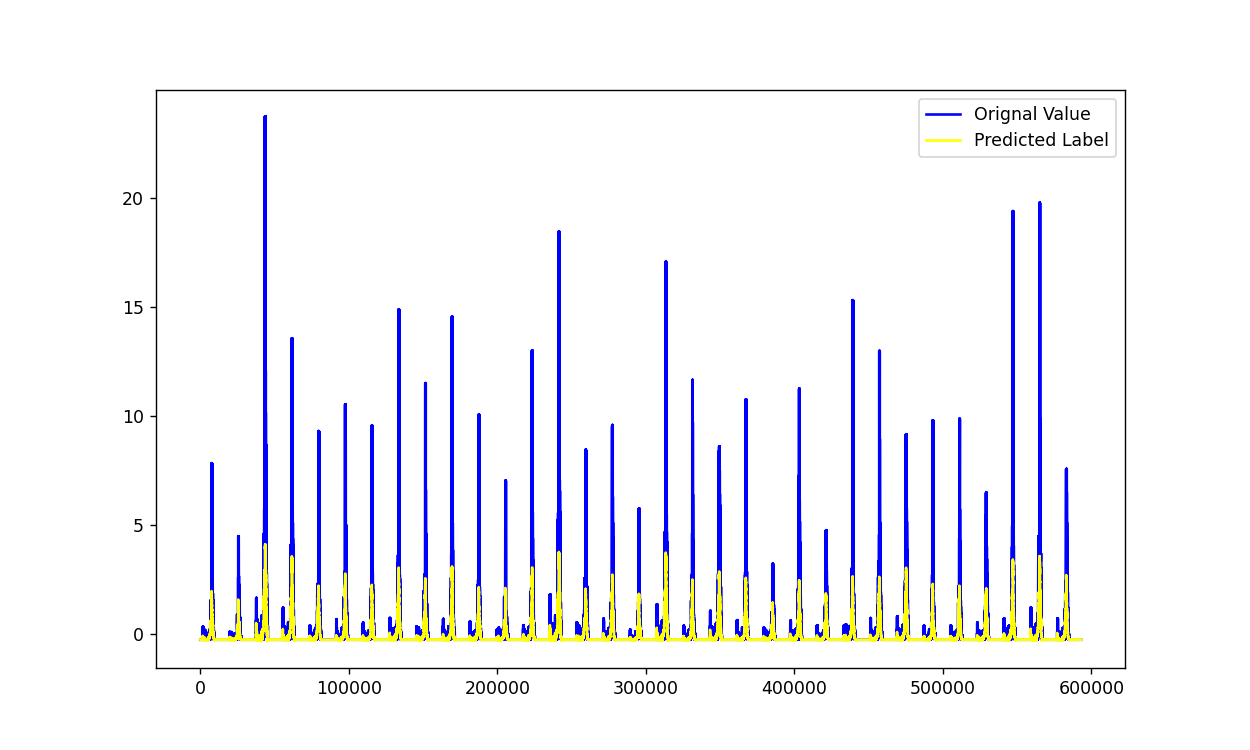

In [31]:
plt.figure(figsize=(10,6))
plt.plot(X_test.flatten(),color='blue',label='Orignal Value')
plt.plot(pred.flatten(),color='yellow',label='Predicted Label')
plt.legend()
plt.show()


In [32]:
model.save('AUTOENCODER.h5')

In [ ]:
'''Now, to address your confusion regarding the output shape: 
The model predicts sequences because of the architecture you've defined. 
Even though you trained it on a 1D array (y_train with shape (41334,)), 
the model is designed to predict sequences of the same length as your input sequences (20 in your case).
It does this by learning a sequence-to-sequence mapping during training. 
So, when you input a sequence of shape (20, 1), the model generates a sequence of predictions with shape (20, 1).

In essence, it's predicting the next 20 values based on the input sequence, 
which makes it a sequence-to-sequence autoencoder. 
This can be a powerful approach for tasks like time series prediction, 
where you want to predict multiple future time steps based on historical data.'''








